### Análise de dados visuais

Esse notebook é para produção de visualizações focadas nos datasets. A ideia é investigar de forma proativa e gerar visuais profissionais e bem estruturados para leitura geral. As informações aqui contidas possuem como fonte o site Oracle's Elixir.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")

player_full_data = full_data[(full_data["position"] != "team") & (full_data["datacompleteness"] == "complete")]

C:\Users\yandrade\AppData\Local\Temp\ipykernel_11528\1276548405.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")


In [3]:
wizer_xp_data = player_full_data[player_full_data["playername"] == "Wizer"]["xpdiffat10"]

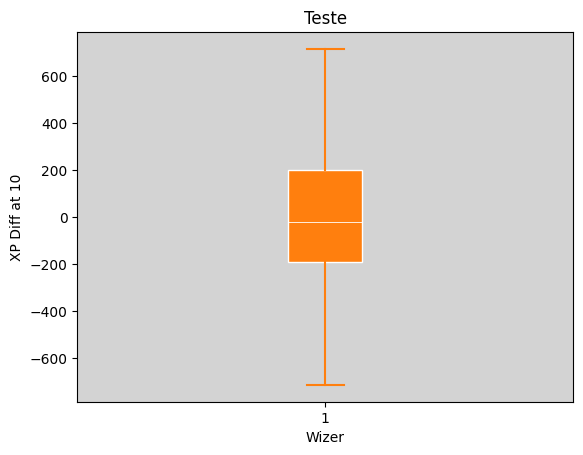

In [4]:
fig, ax = plt.subplots()

dataviz = ax.boxplot(
    wizer_xp_data, 
    showmeans=False,
    showfliers=False, # Remove os outliers da visualização
    patch_artist=True,
    medianprops={"color":"white","linewidth":"0.6"},
    boxprops={"facecolor": "C1","edgecolor":"white"},
    whiskerprops={"color":"C1","linewidth":1.5},
    capprops={"color":"C1","linewidth":1.5},
    )

ax.set_title("Teste")
ax.set_xlabel("Wizer")
ax.set_ylabel("XP Diff at 10")
ax.set_facecolor("lightgray")
#ax.grid()

#### Dados dos jungles da LTA S

Fiquei curioso sobre alguns dados e decidi analisar alguns dados da jungle da LTA S

In [7]:
ltas_jungle_data = player_full_data[(player_full_data["league"] == "LTA S") & (player_full_data["position"] == "jng")]

In [ ]:
# Diversos dados vazios nas colunas, vou ter que pegar dados da leaguepedia

for x  in ltas_jungle_data.columns:
    print(x)

gameid
datacompleteness
url
league
year
split
playoffs
date
game
patch
participantid
side
position
playername
playerid
teamname
teamid
champion
ban1
ban2
ban3
ban4
ban5
pick1
pick2
pick3
pick4
pick5
gamelength
result
kills
deaths
assists
teamkills
teamdeaths
doublekills
triplekills
quadrakills
pentakills
firstblood
firstbloodkill
firstbloodassist
firstbloodvictim
team kpm
ckpm
firstdragon
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
chemtechs
hextechs
dragons (type unknown)
elders
opp_elders
firstherald
heralds
opp_heralds
void_grubs
opp_void_grubs
firstbaron
barons
opp_barons
atakhans
opp_atakhans
firsttower
towers
opp_towers
firstmidtower
firsttothreetowers
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
damagetotowers
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent
gspd
gpr


In [27]:
ltas_jungle_data[["playername","league","wcpm"]]

,playername,league,wcpm
3973,Wiz,LTA S,0.7114
3978,CarioK,LTA S,0.3010
3997,CarioK,LTA S,0.2151
4002,Wiz,LTA S,0.3072
4021,Wiz,LTA S,0.2308
...,...,...,...
114570,Drakehero,LTA S,0.3844
114601,Drakehero,LTA S,0.1579
114606,Josedeodo,LTA S,0.4737
114649,Drakehero,LTA S,0.1230
